In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import skmob
import air_traff_utils as atu


# Visualization of OD (flatten it to 1-dimensional, then plot)

## dg

In [17]:
dg_labels = np.load('./res/deep_grav_labels.npy')
dg_pred = np.load('./res/deep_grav_pred.npy')
print(dg_labels.shape)
print(dg_pred.shape)


(100, 1)
(100, 1)


In [18]:
m = 0
print('The mae loss is %.4f'%atu.mae_loss_func(dg_pred, dg_labels, m))
print('The mape loss is %.4f'%atu.mape_loss_func(dg_pred, dg_labels, m))
print('The smape loss is %.4f'%atu.smape_loss_func(dg_pred, dg_labels, m))
print('The nrmse loss is %.4f'%atu.nrmse_loss_func(dg_pred, dg_labels, m))
print('The nmae loss is %.4f'%atu.nmae_loss_func(dg_pred, dg_labels, m))
print('CPC is %.4f'%atu.get_CPC(dg_pred, dg_labels))

The mae loss is 0.1896
The mape loss is 12.2081
The smape loss is 0.7750
The nrmse loss is 0.3991
The nmae loss is 0.3226
CPC is 0.6088


/Users/kaihangzhang/Downloads/GitHub/Air_Traffic/air_traff_utils.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(eliminate_nan(np.fabs(labels[mask]-preds[mask])/labels[mask]))


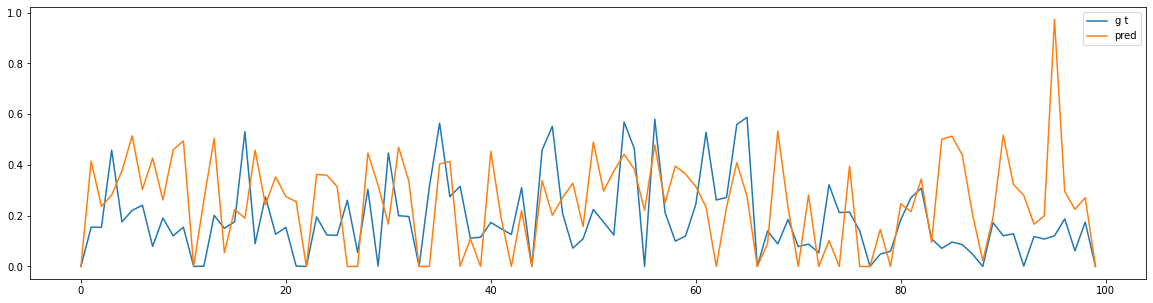

In [19]:
plt.figure(figsize = (20,5))
plt.plot(dg_labels, label='g t')
plt.plot(dg_pred, label='pred')
plt.legend()

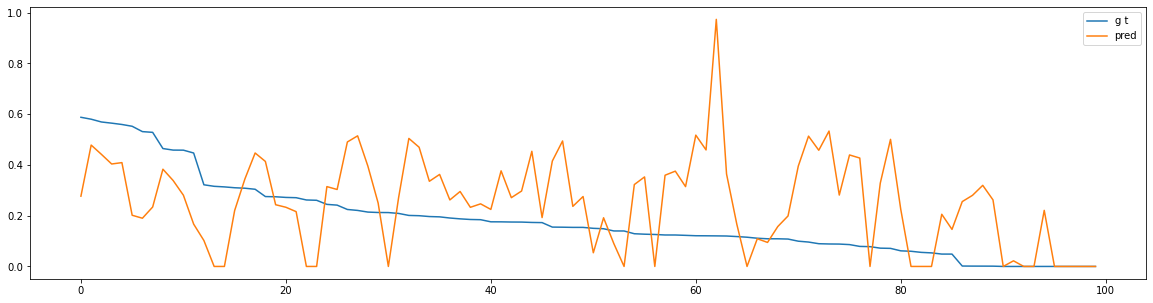

In [30]:
dg_df = pd.DataFrame([], columns=['pred', 'labels'])
dg_df['pred'] = dg_pred.flatten()
dg_df['labels'] = dg_labels.flatten()
dg_df = dg_df.sort_values(by='labels', ascending=False)
dg_df.index = range(dg_df.shape[0])
plt.figure(figsize = (20,5))
plt.plot(dg_df['labels'], label='g t')
plt.plot(dg_df['pred'], label='pred')
plt.legend()

## mfg

In [5]:
dgm_labels = np.load('./res/mfg_labels.npy')
dgm_pred = np.load('./res/mfg_pred.npy')
print(dgm_labels.shape)
print(dgm_pred.shape)


(100, 1)
(100, 1)


In [6]:
m = 0
print('The mae loss is %.4f'%atu.mae_loss_func(dgm_pred, dgm_labels, m))
print('The mape loss is %.4f'%atu.mape_loss_func(dgm_pred, dgm_labels, m))
print('The smape loss is %.4f'%atu.smape_loss_func(dgm_pred, dgm_labels, m))
print('The nrmse loss is %.4f'%atu.nrmse_loss_func(dgm_pred, dgm_labels, m))
print('The nmae loss is %.4f'%atu.nmae_loss_func(dgm_pred, dgm_labels, m))
print('CPC is %.4f'%atu.get_CPC(dgm_pred, dgm_labels))

The mae loss is 0.1424
The mape loss is 12.5244
The smape loss is 0.7899
The nrmse loss is 0.2914
The nmae loss is 0.2423
CPC is 0.5624


/Users/kaihangzhang/Downloads/GitHub/Air_Traffic/air_traff_utils.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(eliminate_nan(np.fabs(labels[mask]-preds[mask])/labels[mask]))


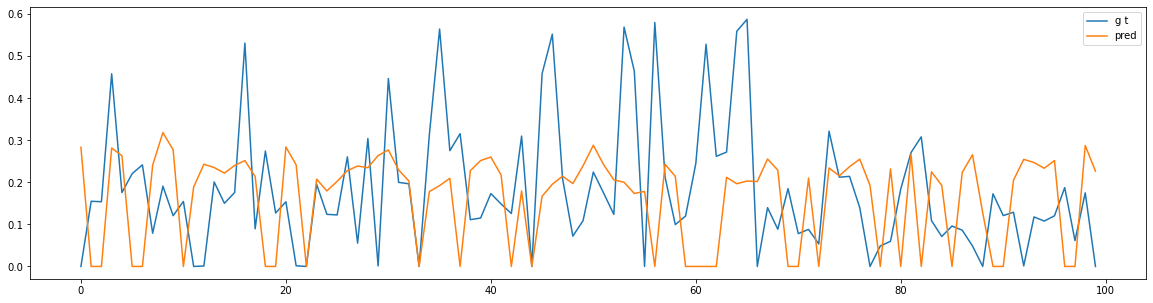

In [7]:
plt.figure(figsize = (20,5))
plt.plot(dgm_labels, label='g t')
plt.plot(dgm_pred, label='pred')
plt.legend()

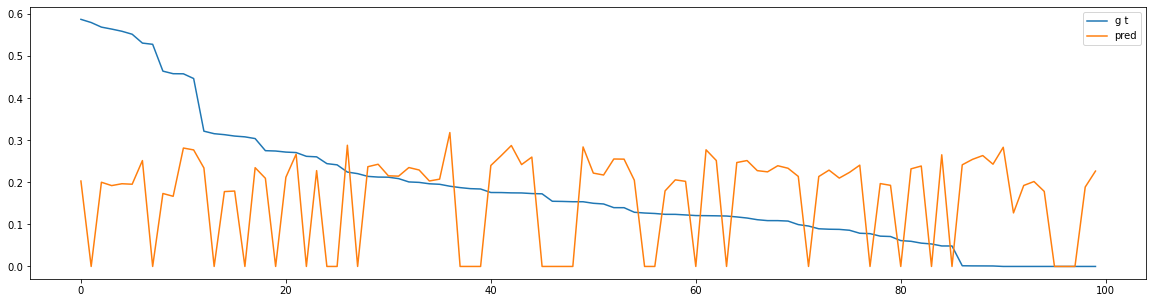

In [31]:
dgm_df = pd.DataFrame([], columns=['pred', 'labels'])
dgm_df['pred'] = dgm_pred.flatten()
dgm_df['labels'] = dgm_labels.flatten()
dgm_df = dgm_df.sort_values(by='labels', ascending=False)
dgm_df.index = range(dgm_df.shape[0])
plt.figure(figsize = (20,5))
plt.plot(dgm_df['labels'], label='g t')
plt.plot(dgm_df['pred'], label='pred')
plt.legend()

# Gravity

In [8]:
g = pd.read_csv('./res/gravity.csv', index_col=0)
np.save('./res/gravity_pred.npy', g.to_numpy().reshape(-1, 1)[288:])

g_labels = pd.read_csv('./res/gravity_labels.csv', index_col=0)
np.save('./res/gravity_labels.npy', g_labels.to_numpy().reshape(-1, 1)[288:])

In [9]:
g_labels = np.load('./res/gravity_labels.npy')
g_pred = np.load('./res/gravity_pred.npy')
print(g_labels.shape)
print(g_pred.shape)

(288, 1)
(288, 1)


In [10]:
m = 0
print('The mae loss is %.4f'%atu.mae_loss_func(g_pred, g_labels, m))
print('The mape loss is %.4f'%atu.mape_loss_func(g_pred, g_labels, m))
print('The smape loss is %.4f'%atu.smape_loss_func(g_pred, g_labels, m))
print('The nrmse loss is %.4f'%atu.nrmse_loss_func(g_pred, g_labels, m))
print('The nmae loss is %.4f'%atu.nmae_loss_func(g_pred, g_labels, m))
print('CPC is %.4f'%atu.get_CPC(g_pred, g_labels))

The mae loss is 0.0570
The mape loss is 3.4668
The smape loss is 0.5345
The nrmse loss is 0.0942
The nmae loss is 0.0570
CPC is 0.7529


C:\Users\10169\Documents\Github\Air_Traffic\air_traff_utils.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(eliminate_nan(np.fabs(labels[mask]-preds[mask])/labels[mask]))


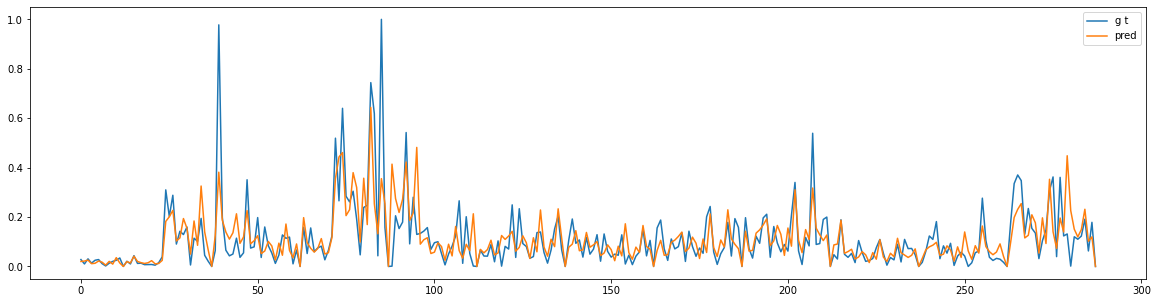

In [11]:
plt.figure(figsize = (20,5))
plt.plot(g_labels, label='g t')
plt.plot(g_pred, label='pred')
plt.legend()

# VAE

In [8]:
vae_labels = np.load('./res/vae_labels.npy').T
vae_pred = np.load('./res/vae_pred.npy').T
print(vae_labels.shape)
print(vae_pred.shape)

(100, 1)
(100, 1)


In [9]:
m = 0
print('The mae loss is %.4f'%atu.mae_loss_func(vae_pred, vae_labels, m))
print('The mape loss is %.4f'%atu.mape_loss_func(vae_pred, vae_labels, m))
print('The smape loss is %.4f'%atu.smape_loss_func(vae_pred, vae_labels, m))
print('The nrmse loss is %.4f'%atu.nrmse_loss_func(vae_pred, vae_labels, m))
print('The nmae loss is %.4f'%atu.nmae_loss_func(vae_pred, vae_labels, m))
print('CPC is %.4f'%atu.get_CPC(vae_pred, vae_labels))

The mae loss is 0.1301
The mape loss is 8.5402
The smape loss is 0.5921
The nrmse loss is 0.2926
The nmae loss is 0.2218
CPC is 0.7081


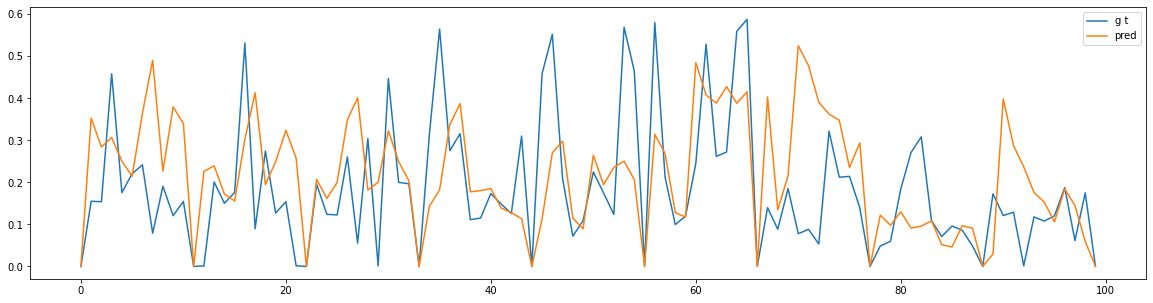

In [10]:
plt.figure(figsize = (20,5))
plt.plot(vae_labels, label='g t')
plt.plot(vae_pred, label='pred')
plt.legend()

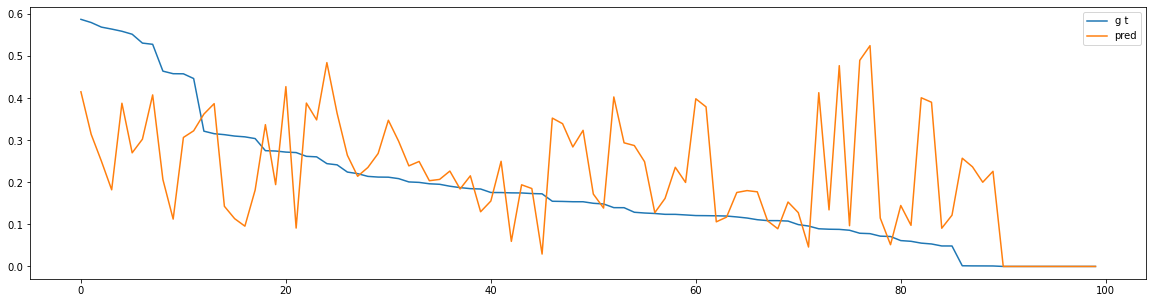

In [32]:
vae_df = pd.DataFrame([], columns=['pred', 'labels'])
vae_df['pred'] = vae_pred.flatten()
vae_df['labels'] = vae_labels.flatten()
vae_df = vae_df.sort_values(by='labels', ascending=False)
vae_df.index = range(vae_df.shape[0])
plt.figure(figsize = (20,5))
plt.plot(vae_df['labels'], label='g t')
plt.plot(vae_df['pred'], label='pred')
plt.legend()

# results in one graph

In [11]:
from sklearn import preprocessing

In [12]:
us_CSA = pd.read_csv('./data/us_CSA.csv', index_col=0)
OD_df = pd.read_csv('./outputs/201904_OD_CSA.csv', index_col=0).sort_index(axis=0).sort_index(axis=1)
CSA_df = pd.read_csv('./data/CSA_df.csv')

In [13]:
combined_airports3 = ['NYC', 'WAS']
OD_df.loc[combined_airports3] = OD_df.loc[combined_airports3]/3
OD_df[combined_airports3] = OD_df[combined_airports3]/3
OD_df.loc[combined_airports3, combined_airports3] = OD_df.loc[combined_airports3, combined_airports3]*3

combined_airports2 = ['CHI', 'MIA']
OD_df.loc[combined_airports2] = OD_df.loc[combined_airports2]/2
OD_df[combined_airports2] = OD_df[combined_airports2]/2
OD_df.loc[combined_airports2, combined_airports2] = OD_df.loc[combined_airports2, combined_airports2]*2


In [14]:
# normalize OD
scalar_OD = preprocessing.MinMaxScaler().fit(OD_df.to_numpy().reshape(-1, 1))
OD_df_values = scalar_OD.transform(OD_df.to_numpy().reshape(-1, 1)).reshape(24, 24)
OD_df = pd.DataFrame(OD_df_values, index=OD_df.index, columns=OD_df.columns)

In [15]:
print(scalar_OD.data_max_)
print(scalar_OD.data_min_)

[29011.]
[0.]


In [16]:
color_lst = ['blue', 'green', 'orange', 'red', 'red']
alpha_lst = [1,1,1, 1, 1]
lw_ls = [1.5,1,1, 1.5, 1]

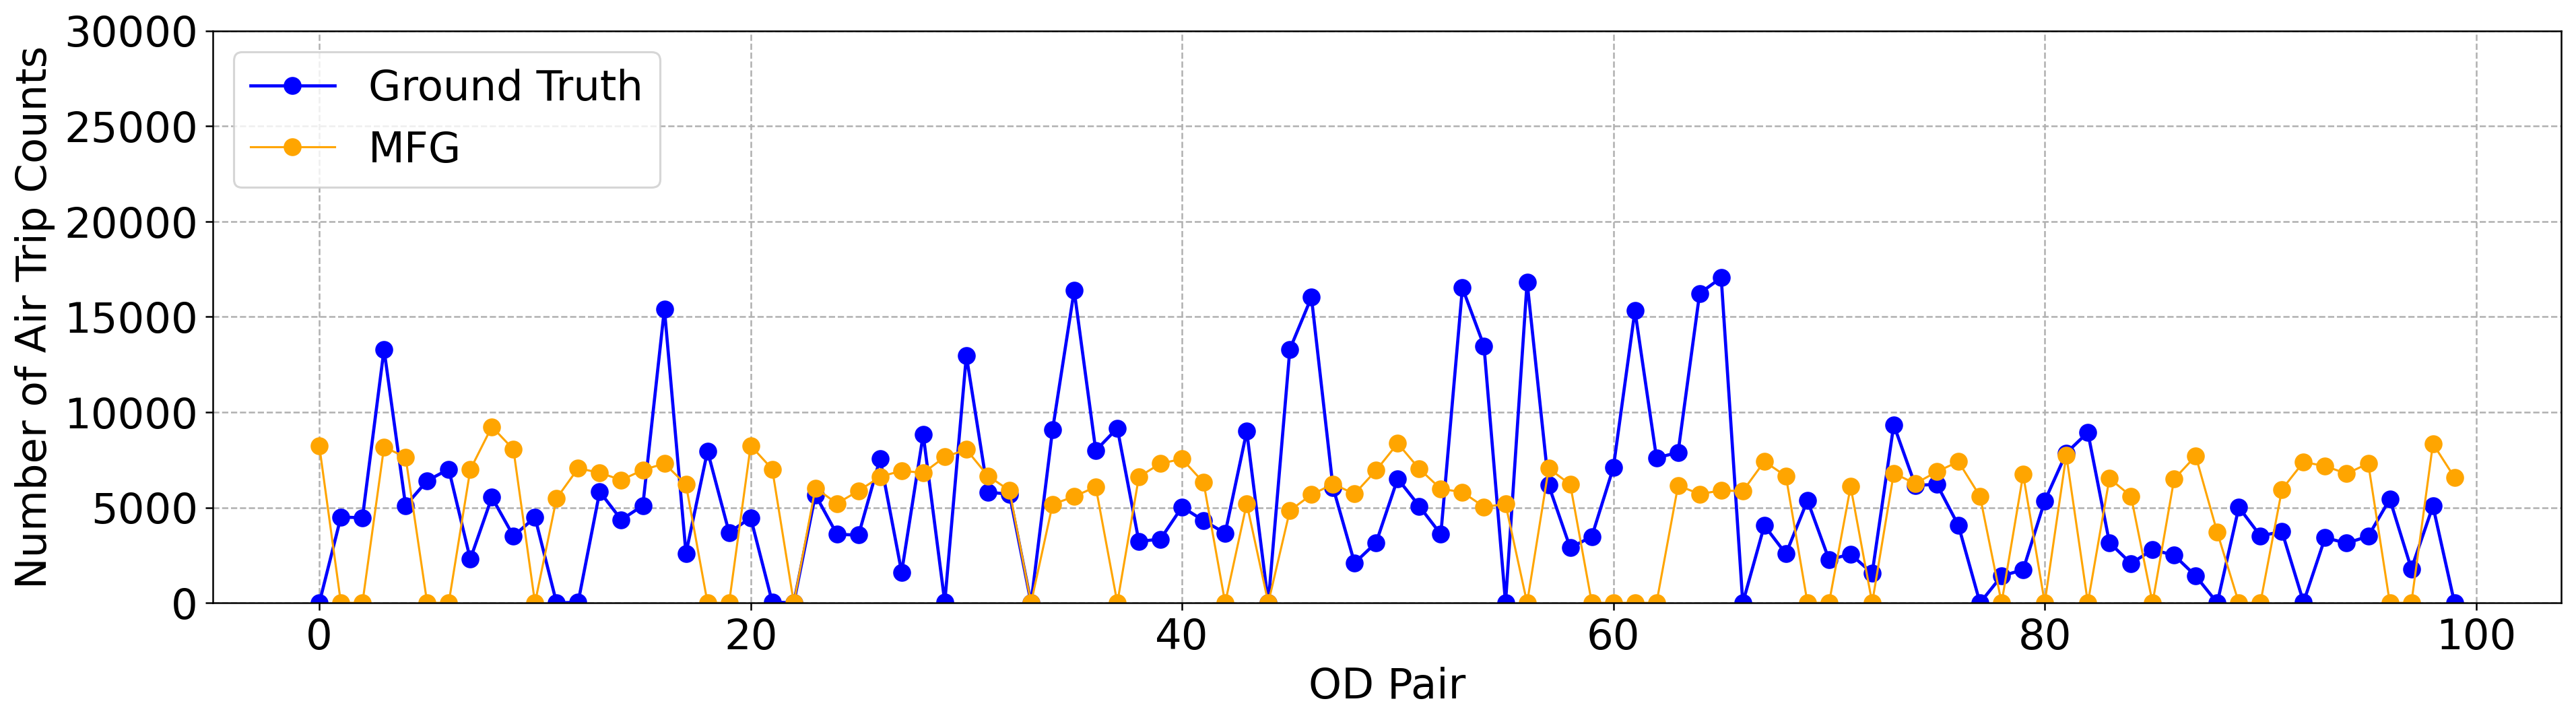

In [100]:
# 把真实值、dg、dgm画在一个图上，
# 颜色、alpha、lw设置使用上面定义的列表中的值
# 真实值是蓝色，和其他对应的alpha、lw
# dg是绿色，dgm是橙色
fs = 20
plt.figure(figsize=[20,5], dpi=225)
plt.plot(dg_labels*29011, '.-', markersize=15, label='Ground Truth', lw=lw_ls[0],color = color_lst[0],alpha = alpha_lst[0])
# plt.plot(g_pred*29011, label='GM', lw=lw_ls[3],color = color_lst[3],alpha = alpha_lst[3])
# plt.plot(dg_pred*29011, '.-', markersize=15, label='DG', lw=lw_ls[1],color = color_lst[1],alpha = alpha_lst[1])
plt.plot(dgm_pred*29011, '.-', markersize=15, label='MFG', lw=lw_ls[2],color = color_lst[2],alpha = alpha_lst[2])
# plt.plot(vae_pred*29011, '.-', markersize=15, label='VAE', lw=lw_ls[4],color = color_lst[4],alpha = alpha_lst[4])
plt.xlabel('OD Pair', fontsize=fs)
plt.ylabel('Number of Air Trip Counts', fontsize=fs)
plt.legend(fontsize=fs, loc=2)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim([0, 30000])
plt.grid(ls='--')

# OD Visualization

In [63]:
import geopandas as gpd

city_coor = CSA_df.iloc[:, :3]
city_coor.head(2)

us_CSA_gpd = gpd.read_file('./data/us_CSA.shp')
us_CSA_gpd.crs = {'init' :'epsg:4326'}
# us_CSA_gpd.to_crs(28992)
us_state_gpd = gpd.read_file('./data/us_state.shp')
us_state_gpd.crs = {'init' :'epsg:4326'}
# us_state_gpd.to_crs(28992)

data_X_all = us_CSA_gpd.loc[us_CSA_gpd['if_plot']==1]
data_X_all.head(2)

C:\Users\10169\anaconda3\envs\bda_traff\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\10169\anaconda3\envs\bda_traff\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,TotPop,CSA,CBSA,CBSA_Name,AutoOwn0,AutoOwn1,AutoOwn2p,TotEmp,E_LowWageW,E_MedWageW,...,D4C,D4D,D5AR,D5AE,NatWalkInd,INTPTLAT,INTPTLON,CSA_Name,if_plot,geometry
6,6584708,122.0,29300.0,"LaGrange, GA-AL",142257,759558,1449909,2970375,668868,969644,...,-60276.863137,-60268.179268,310871248,224466891,8.498581,33.834001,-84.305803,"Atlanta--Athens-Clarke County--Sandy Springs, ...",1,"POLYGON ((-85.16585 32.80850, -85.16563 32.808..."
13,8200935,148.0,49340.0,"Worcester, MA-CT",349774,1079810,1704849,3823517,825804,1051349,...,-28799.664050,-28642.284283,646668796,596458073,11.342761,42.293282,-71.237945,"Boston-Worcester-Providence, MA-RI-NH-CT",1,"MULTIPOLYGON (((-71.88392 41.32650, -71.88213 ..."


In [95]:
def plot_OD(OD, labels, title):
    # OD is 1-dimensional data
    try:
        OD = np.array(OD)
    except Exception as e:
        OD = OD.cpu().detach().numpy()
    OD = OD.reshape(10, 10)
    labels = labels.reshape(10, 10)
    OD[labels==0]=0

    fig = plt.figure(figsize=[15, 10], dpi=75)
    ax0 = fig.add_subplot(111)
    ax0.set_title(title)
    ax0.grid(ls='--')
    ax0.set_xlim([-130,-62.5])
    ax0.set_ylim([22.5, 52.5])

    us_state_gpd.plot(ax=ax0, alpha=0.5, color='blue')
    data_X_all.plot(column='TotPop', ax=ax0, cmap='RdPu')

    low_lon_dest = []
    low_lat_dest = []
    mid_lon_dest = []
    mid_lat_dest = []
    high_lon_dest = []
    high_lat_dest = []
    low_lon_origin = []
    low_lat_origin = []
    mid_lon_origin = []
    mid_lat_origin = []
    high_lon_origin = []
    high_lat_origin = []


    for i in range(OD.shape[0]):
        for j in range(OD.shape[1]):
            trip_OD = OD[i, j]
            trip_label = labels[i, j]

            org = OD_df.index[i+14]
            lon_origin = CSA_df.loc[CSA_df['Airport']==org, 'lon']
            lat_origin = CSA_df.loc[CSA_df['Airport']==org, 'lat']

            dest = OD_df.columns[j+14]
            lon_dest = CSA_df.loc[CSA_df['Airport']==dest, 'lon']
            lat_dest = CSA_df.loc[CSA_df['Airport']==dest, 'lat']

            if trip_OD-labels.min()<(labels.max()-labels.min())*0.3:
                low_lon_dest.append(lon_dest)
                low_lat_dest.append(lat_dest)
                low_lon_origin.append(lon_origin)
                low_lat_origin.append(lat_origin)
            elif trip_OD-labels.min()>=(labels.max()-labels.min())*0.3 and trip_OD-labels.min()<(labels.max()-labels.min())*0.6:
                mid_lon_dest.append(lon_dest)
                mid_lat_dest.append(lat_dest)
                mid_lon_origin.append(lon_origin)
                mid_lat_origin.append(lat_origin)
            elif trip_OD-labels.min()>=(labels.max()-labels.min())*0.6:
                high_lon_dest.append(lon_dest)
                high_lat_dest.append(lat_dest)
                high_lon_origin.append(lon_origin)
                high_lat_origin.append(lat_origin)


    for i in range(len(low_lon_dest)):
        ax0.plot([low_lon_origin[i], low_lon_dest[i]], [low_lat_origin[i], low_lat_dest[i]], 'b', lw=0.3)
    ax0.plot([low_lon_origin[i], low_lon_dest[i]], [low_lat_origin[i], low_lat_dest[i]], 'b', lw=0.3, label='Low flow')

    for i in range(len(mid_lon_dest)):
        ax0.plot([mid_lon_origin[i], mid_lon_dest[i]], [mid_lat_origin[i], mid_lat_dest[i]], 'orange', lw=1)
    ax0.plot([mid_lon_origin[i], mid_lon_dest[i]], [mid_lat_origin[i], mid_lat_dest[i]], 'orange', lw=1, label='Mid flow')

    for i in range(len(high_lon_dest)):
        ax0.plot([high_lon_origin[i], high_lon_dest[i]], [high_lat_origin[i], high_lat_dest[i]], 'red', lw=2.5)
    try:
        ax0.plot([high_lon_origin[i], high_lon_dest[i]], [high_lat_origin[i], high_lat_dest[i]], 'red', lw=2.5, label='High flow')
    except:
        None

    # plot airports
    for i in city_coor.index:
        lon = city_coor.loc[i, 'lon']
        lat = city_coor.loc[i, 'lat']
        ax0.plot(lon, lat, '*', color='blue', markersize=15)
    
    ax0.legend()
    return fig


In [96]:
def plot_OD2(OD, labels, title):
    # OD is 1-dimensional data
    try:
        OD = np.array(OD)
    except Exception as e:
        OD = OD.cpu().detach().numpy()
    OD = OD.reshape(10, 10)
    labels = labels.reshape(10, 10)
    OD[labels==0]=0

    fig = plt.figure(figsize=[15, 10])
    ax0 = fig.add_subplot(111)
    ax0.set_title(title)
    ax0.grid(ls='--')

    us_state_gpd.plot(ax=ax0, alpha=0.9, color='black')
    data_X_all.plot(column='TotPop', ax=ax0, cmap='RdPu')
    
    for i in range(OD.shape[0]):
        for j in range(OD.shape[1]):
            trip_OD = OD[i, j]

            org = OD_df.index[i+14]
            lon_origin = CSA_df.loc[CSA_df['Airport']==org, 'lon']
            lat_origin = CSA_df.loc[CSA_df['Airport']==org, 'lat']

            dest = OD_df.columns[j+14]
            lon_dest = CSA_df.loc[CSA_df['Airport']==dest, 'lon']
            lat_dest = CSA_df.loc[CSA_df['Airport']==dest, 'lat']
            
            c = min(np.sqrt(max(0, trip_OD) ), 1)
            ax0.plot([lon_origin, lon_dest], [lat_origin, lat_dest], lw=np.exp(c*2), color=str(c))
            
    # plot airports
    for i in city_coor.index:
        lon = city_coor.loc[i, 'lon']
        lat = city_coor.loc[i, 'lat']
        ax0.plot(lon, lat, '*', color='blue', markersize=15)
    return fig
    

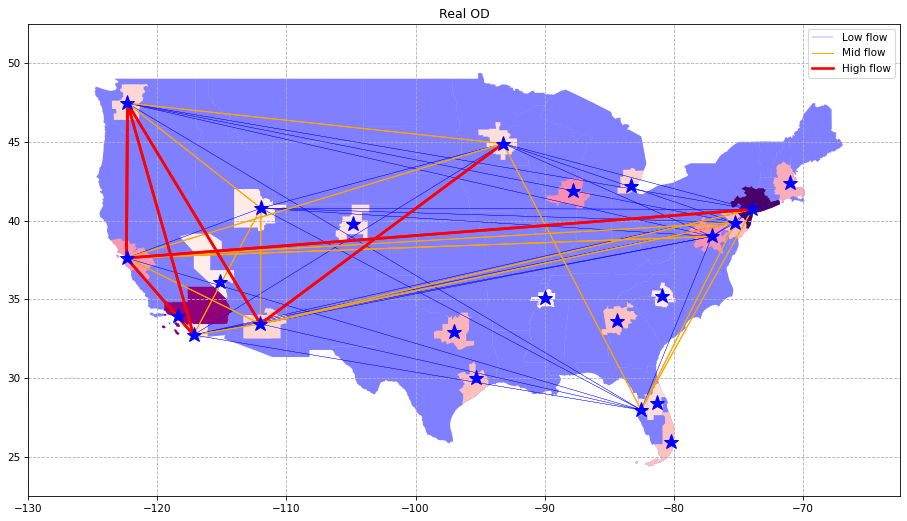

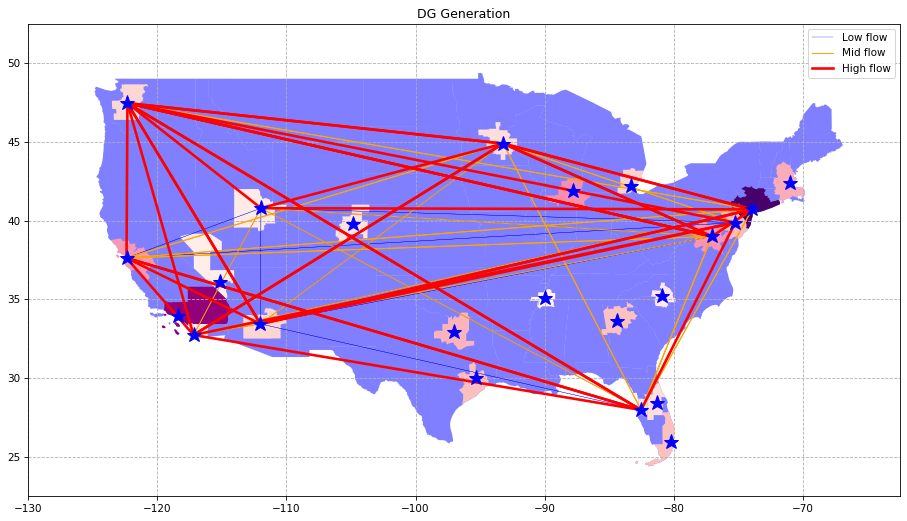

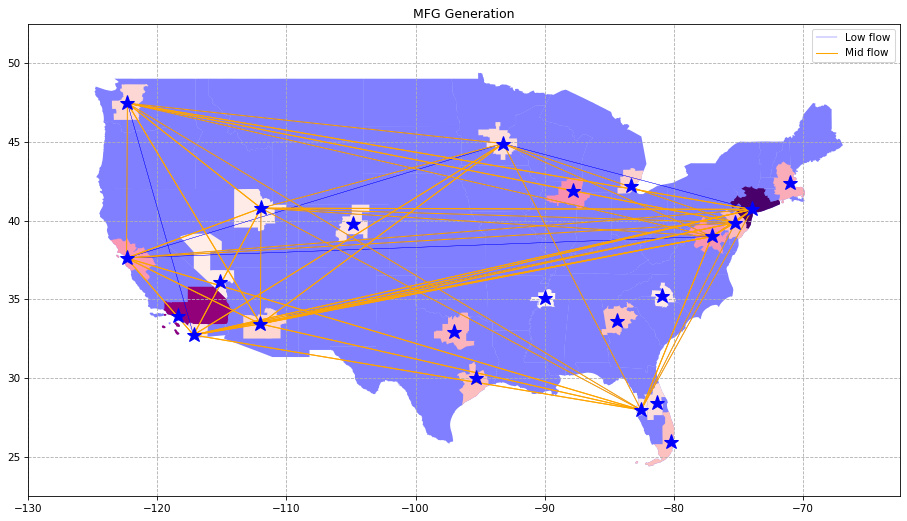

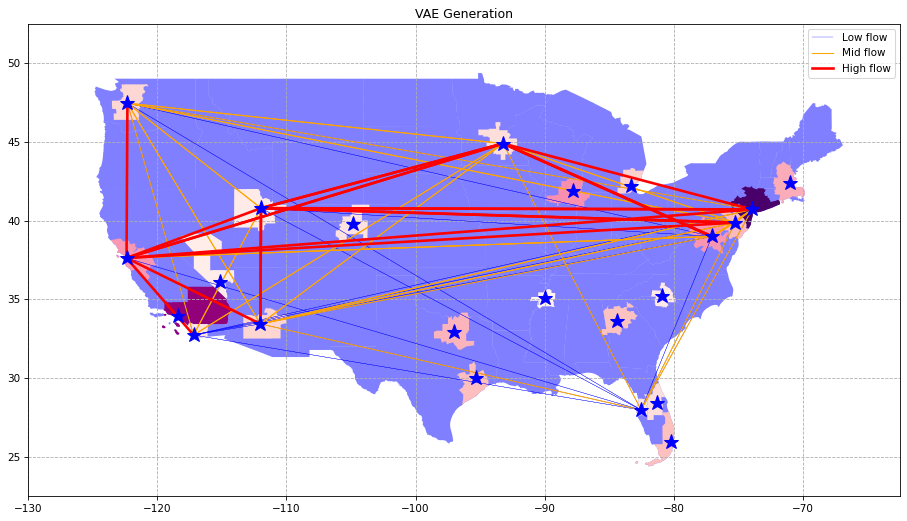

In [97]:
fig_real = plot_OD(dg_labels, dg_labels, 'Real OD')
fig_dg = plot_OD(dg_pred, dg_labels, 'DG Generation')
fig_mfg = plot_OD(dgm_pred, dgm_labels, 'MFG Generation')
fig_vae = plot_OD(vae_pred, vae_labels, 'VAE Generation')

# fig_real = fig_real.savefig('./res/fig_real.png', dpi=300)
# fig_dg = fig_dg.savefig('./res/fig_dg.png', dpi=300)
# fig_mfg = fig_mfg.savefig('./res/fig_mfg.png', dpi=300)
# fig_vae = fig_vae.savefig('./res/fig_vae.png', dpi=300)


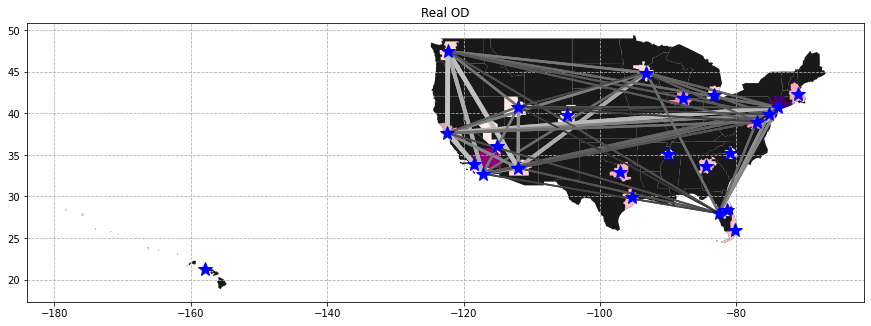

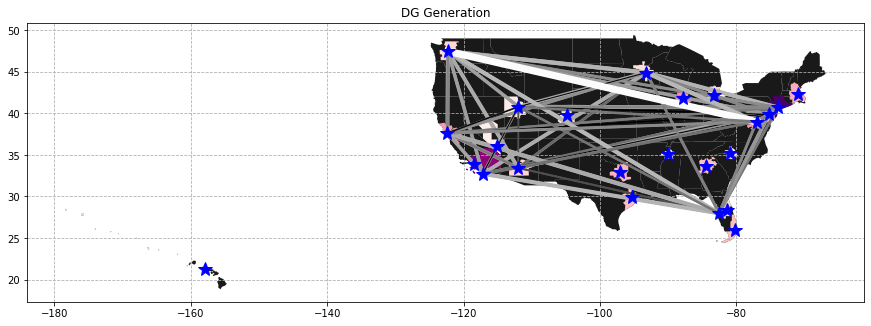

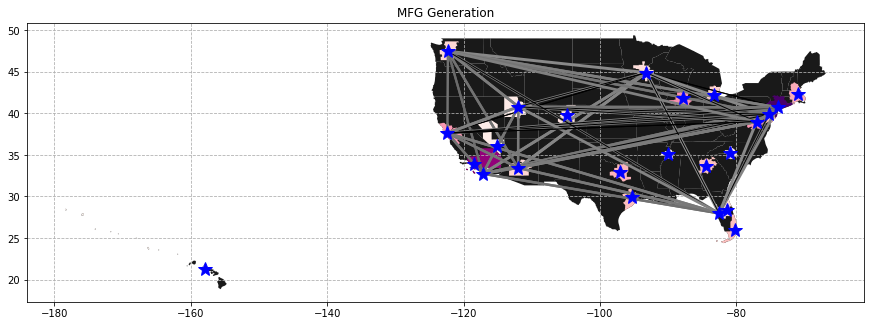

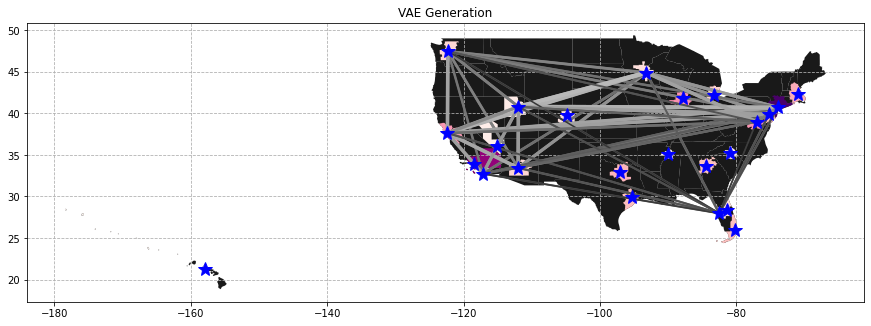

In [98]:
fig_real = plot_OD2(dg_labels, dg_labels, 'Real OD')
fig_dg = plot_OD2(dg_pred, dg_labels, 'DG Generation')
fig_mfg = plot_OD2(dgm_pred, dgm_labels, 'MFG Generation')
fig_vae = plot_OD2(vae_pred, vae_labels, 'VAE Generation')

# fig_real = fig_real.savefig('./res/fig_real.png', dpi=300)
# fig_dg = fig_dg.savefig('./res/fig_dg.png', dpi=300)
# fig_mfg = fig_mfg.savefig('./res/fig_mfg.png', dpi=300)
# fig_vae = fig_vae.savefig('./res/fig_vae.png', dpi=300)
